# LENDING CLUB CASE STUDY

## Problem Statement

Lending club need to carry out credit analysis of each borrowers so as to know the credit risk associated, probability of defaulting which will be used to make the lending decision. The goal is to identify the important drivers that leads to defaulting. The objective of this analysis is to avoid credit loss.

In [5]:
#Loading the libraries
##Libraries for data manipulation
import numpy as np
from numpy import isnan
import pandas as pd 
from sklearn.impute import SimpleImputer
#Libraries for data plotting 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
#Setting options to print all columns for large dataset - For better visualization
pd.options.display.max_columns = None

In [7]:
#Read data from csv file 
df = pd.read_csv("loan.csv")

In [8]:
#Check the first 5 rows of data 
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [9]:
#check the amount of rows and columns in the dataset
df.shape

(39717, 111)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding and Manipulation

In this section, the data will be analysed and only relevant columns and rows will be kept. The first step is to identify the number of null values in each column and row. Data duplicacy will be checked and each column will be converted to appropriate data types.

In [11]:
#Idenfifying how many null values are there in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Elimination criteria for Columns
1. Missing values over 60% 
2. Single unique value 
3. Customer behaviour attributes

We have decided to drop all the columns that have over 60% null values as this will add little to no value to the analysis. The thresh parameter will be used,it allows us to indicate which columns to keep based on the number of non-null values they contain. Customer behavioural attributes will be dropped because they are not known at the time of application and hence cannot be used as a predictive factor.

In [12]:
#Calculating the null percentage for each column
na_percentage = df.isnull().sum() * 100 / len(df)
print(na_percentage)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [13]:
#Drop all columns that have 60% or more null values 
thresh = len(df) * .4
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [14]:
#Drop all single-valued column
df = df[[i for i in df if df[i].nunique()>1]]

In [15]:
df.shape

(39717, 45)

In [16]:
#Analyse remaining col and only keep those factors that will be considered to quantify the credit risk 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [17]:
#dropping customer behavioural variables
loan_df = df.drop(['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','open_acc','out_prncp','out_prncp_inv','recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','last_pymnt_amnt','last_pymnt_d'], axis=1)

In [18]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [19]:
#dropping certain columns under customer demographic attributes
#The desc and title of the loan will not be dropped, it could only be an important factor if NLP is carried 
#on the data and important keywords are extracted. 
#Full zip code is not provided hence no other attributes can be derived from it and as such is meaningless in this case
loan_df = loan_df.drop(['url', 'desc', 'title', 'zip_code'], axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

### Elimination Criteria for Rows
1. Rows have all missing values
2. All rows that falls under current 

Records with loan status as current will be dropped because it will not help us to identify the credit risk -- we are not performing machine learning algorithm to predict, we are only analysing existing data with indicators so as to determine the leading factors.

In [20]:
#check if any rows have all missing values
loan_df.isnull().all(axis=1).sum()

0

In [21]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [22]:
#dropping loan with status as current because it wont help in the prediction 
loan_df = loan_df[~(loan_df.loan_status == "Current")]

## Data Processing

In this section, we will select the most important feature to work with and handle:
1. Missing data
2. Imbalanced data
3. Outliers
4. Data types


In [23]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [24]:
#Deriving column defaulter as this will be used as the target variable -- when fed into ml algorithm
loan_df['defaulter'] = loan_df['loan_status'].apply(lambda x: 0 if x=="Fully Paid" else 1)

In [25]:
loan_df['defaulter'].value_counts()

0    32950
1     5627
Name: defaulter, dtype: int64

In [26]:
#Analysing data in term column
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [27]:
#Changing it to be an integer column and dropping the word 'months'
loan_df['term'] =loan_df['term'].apply(lambda x:x.split()[0])
loan_df['term'] = loan_df['term'].astype('int64')

In [28]:
#Analysing data in interest rate column
loan_df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [29]:
#Changing it to be an float column and dropping the character '%'
loan_df['int_rate'] =loan_df['int_rate'].apply(lambda x:x[:-1])
loan_df['int_rate'] = loan_df['int_rate'].astype('float64')
loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [30]:
#Analysing data in grade column 
loan_df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [31]:
#Analysing data in subgrade column 
loan_df['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [32]:
#Analysing data in Home ownership column 
loan_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [33]:
#Given that we have a category called 'others', we will replace the home_ownership data of none to 'Others'.
#This will not change the distribution as there are only 3 records.
loan_df['home_ownership']= loan_df['home_ownership'].apply(lambda x :'OTHER' if x == 'NONE'  else x)
loan_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

In [34]:
#Analysing data in verification status column 
loan_df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [35]:
#Given that source verified and verified has the same meaning, we will combine them under 'verified'.
loan_df['verification_status']= loan_df['verification_status'].apply(lambda x :'Verified' if x == 'Source Verified'  else x)

In [36]:
#Analysing data in purpose column 
loan_df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [37]:
#Analysing data in emp_title column 
loan_df['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [38]:
#Dropping column 'emp_title' because of it's high-cardinality
loan_df = loan_df.drop(['emp_title'], axis=1)

#### Handling Categorical Variable
All categorical variable have to be encoded before building a model. After analysing the above columns -- we can conclude that grade and sub_grade column are ordinal and it can be encoded using label encoding -- they will be assigned numerical values in a separate single column. On the other hand, purpose, verification_status and home ownership are of norminal kind. Hence they can be encoded using One-Hot encoding and this algorithm will transform all the elements into  new columns represented by 0 or 1. One-hot encoding is suitable because those columns are of low cardinality.  

The encoding will not be carried out in this assignment as we will not be building any model.

The column emp_title cardinality is too high and it will not be a strong signal for identifying defaulters and hence is dropped.

In [39]:
#Analysing data in annual_inc column
loan_df['annual_inc'].value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: annual_inc, Length: 5215, dtype: int64

In [40]:
#Analysing data in dti column
loan_df['dti'].value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

#### Handling Missing Value

In [41]:
#checking the percentage of null values in each column
#we notice there are only 2 columns with null and should be tackled 
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
pub_rec                 0.00
pub_rec_bankruptcies    1.81
defaulter               0.00
dtype: float64

In [42]:
#Analysing data in emp_lenght column
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [43]:
#check number of missing values in emp_length
loan_df['emp_length'].isnull().sum()

1033

In [44]:
# So as to avoid introducing biasness in the data and to avoid changing the data distribution
# We shall drop those rows with null values
# Only keeping rows with non null values
loan_df = loan_df[loan_df['emp_length'].notna()]

In [45]:
#Cleaning emp_length by removing words like '<', 'years', 'year' from the data and converting it to float
#Those with 10 years of experience will be given value 10 and those will less than 1 year shall be assigned 1
unauth_words = ['<', 'years', 'year']
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in unauth_words))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x.replace("+", ""))
loan_df['emp_length'] = loan_df['emp_length'].astype('float64')

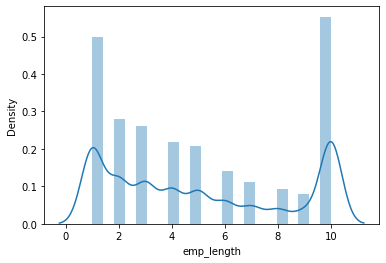

In [46]:
#Plot to check the distribution of col emp_length
sns.distplot(loan_df['emp_length'])
plt.show()

In [47]:
#calculate the number of rows with null values in col 'pub_rec_bankruptcies'
loan_df['pub_rec_bankruptcies'].isnull().sum()

697

In [48]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

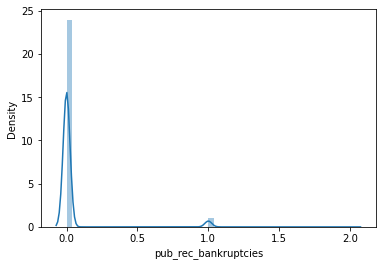

In [49]:
#Plot to check the distribution of col 'pub_rec_bankruptcies'
sns.distplot(loan_df['pub_rec_bankruptcies'])
plt.show()

In [50]:
#So as not to change the distribution, we shall impute the missing rows with mode -- in this case value 0
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace=True)

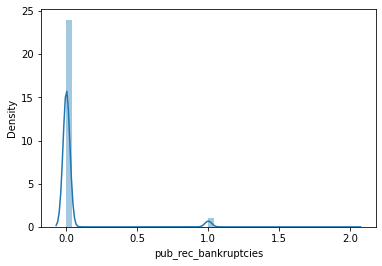

In [51]:
#distribution did not change
sns.distplot(loan_df['pub_rec_bankruptcies'])
plt.show()

In [52]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   member_id             37544 non-null  int64  
 2   loan_amnt             37544 non-null  int64  
 3   funded_amnt           37544 non-null  int64  
 4   funded_amnt_inv       37544 non-null  float64
 5   term                  37544 non-null  int64  
 6   int_rate              37544 non-null  float64
 7   installment           37544 non-null  float64
 8   grade                 37544 non-null  object 
 9   sub_grade             37544 non-null  object 
 10  emp_length            37544 non-null  float64
 11  home_ownership        37544 non-null  object 
 12  annual_inc            37544 non-null  float64
 13  verification_status   37544 non-null  object 
 14  issue_d               37544 non-null  object 
 15  loan_status        

#### Handling Outliers and Deriving New variables
Variable that will be derived are:

 1. issue_year and issue_month from issue_d (used to visualized loan amount per year and month)
 
The following variables are derived because they are important factor of the borrower's financial health. They 
are strong indicator of the borrower's capability to repay the loan. Given that the loans are paid back in instalment, it is vital to know their monthly earning and spending. If the current debt plus the installment exceeed the monthly income, it is safe to say that the borrower will have a hard time to repay the loan. 

 2. monthly_inc (Borrower monthly income)
 3. monthly_debt_p (Current monthly debt being paid by the borrower)
 4. total_m_debt (Total debt including the loan instalment of each borrower)
 5. a_dti (The DTI of each borrower in respect to the total debt)

In [53]:
#Analsying data in issue_d col
loan_df['issue_d'].value_counts()

Dec-11    1994
Nov-11    1971
Oct-11    1863
Sep-11    1837
Aug-11    1751
Jun-11    1675
Jul-11    1674
May-11    1554
Apr-11    1505
Mar-11    1402
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [54]:
#Changing the format to datetime for proper manipulation
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [55]:
#Deriving month and year variable -- good indication of loans provided per year and month
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month

In [56]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37544 non-null  int64         
 1   member_id             37544 non-null  int64         
 2   loan_amnt             37544 non-null  int64         
 3   funded_amnt           37544 non-null  int64         
 4   funded_amnt_inv       37544 non-null  float64       
 5   term                  37544 non-null  int64         
 6   int_rate              37544 non-null  float64       
 7   installment           37544 non-null  float64       
 8   grade                 37544 non-null  object        
 9   sub_grade             37544 non-null  object        
 10  emp_length            37544 non-null  float64       
 11  home_ownership        37544 non-null  object        
 12  annual_inc            37544 non-null  float64       
 13  verification_sta

In [57]:
#check for outliers in annual income before calculating monthly income
fig = px.box(loan_df, x="annual_inc")
fig.show()

In [58]:
# Some values are clearly out of bound and need to be removed
# Calculate quantiles and IQR
q1 = loan_df['annual_inc'].quantile(0.25)
q3 = loan_df['annual_inc'].quantile(0.75)
iqr = q3 - q1
lower_ex =  q1 - 1.5 * iqr
upper_ex = q3 + 1.5 * iqr
#Dropping all rows whose annual_inc is less than lower extreme or upper extreme -- they are outliers.
out = loan_df[(loan_df['annual_inc'] < lower_ex) | (loan_df['annual_inc'] > upper_ex)].index
loan_df.drop(out, inplace= True)

In [59]:
#Plotting the boxplot again to see the difference
fig = px.box(loan_df, x="annual_inc")
fig.show()

In [60]:
#Deriving monthly_inc variable from annual_inc
loan_df['monthly_inc'] = loan_df['annual_inc'].apply(lambda x: round(x/12 ,2))
loan_df['monthly_inc'].value_counts()

5000.00    1434
4166.67    1010
3333.33     838
3750.00     794
6250.00     779
           ... 
2404.50       1
3314.92       1
4233.33       1
6936.33       1
2281.33       1
Name: monthly_inc, Length: 4607, dtype: int64

In [61]:
#Deriving the amount of monthly debt that the borrower need to pay
loan_df['monthly_debt_p'] = round(loan_df['dti']* (loan_df['annual_inc']/12), 2)
loan_df['monthly_debt_p'].value_counts()

0.00         160
1500.00       32
2000.00       22
55000.00      20
61500.00      19
            ... 
51190.94       1
138024.17      1
158724.15      1
208108.33      1
26198.33       1
Name: monthly_debt_p, Length: 24521, dtype: int64

In [62]:
#Creating new variable total debt variable which is a sum of their actual monthly debt payment in addition to
#the loan monthly installment - help to identify the financial of the borrower in comparison to monthly income
loan_df['total_m_debt'] = loan_df['installment'] + loan_df['monthly_debt_p']
loan_df['total_m_debt'].value_counts()

38600.64     2
31724.56     2
124760.28    2
131191.82    2
59983.36     2
            ..
195.27       1
113135.76    1
151028.63    1
69497.18     1
26453.76     1
Name: total_m_debt, Length: 35758, dtype: int64

In [63]:
#Creating new variable total dti variable which takes into account loan installment to assess the borrower's financial help
loan_df['a_dti'] = round (loan_df['total_m_debt'] / (loan_df['annual_inc']/12), 2)
loan_df['a_dti'].value_counts()

14.64    32
14.78    31
11.92    30
11.25    29
14.79    29
         ..
28.77     1
27.96     1
29.72     1
28.53     1
26.07     1
Name: a_dti, Length: 2845, dtype: int64

In [64]:
loan_df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec                          int64
pub_rec_bankruptcies           float64
defaulter                        int64
issue_year                       int64
issue_month                      int64
monthly_inc                    float64
monthly_debt_p           

## Data Visualization and Binning 

In [65]:
sns.set_theme(style="darkgrid", palette="Set2")

#Define a function to ploting barchat using seaborn including proper annotation
def plot_barchart(data, x_col,hue_col,show_perc,  x_label, chart_title,orient_h = False,
                  fig_dim_x = 10, fig_dim_y = 8):
    
     #Setting the dimension of the graph
    fig_dims = (fig_dim_x, fig_dim_y)
    fig, ax = plt.subplots(figsize=fig_dims)

    if orient_h : #To show barchart in horizontal orientation
        ax = sns.countplot(y=x_col,hue = hue_col,order=x_col.value_counts(ascending=False).index)
        ax.set(ylabel = x_label, title = chart_title)
    else: #To show barchart in vertical orientation
        ax = sns.countplot(x=x_col,hue = hue_col,order=x_col.value_counts(ascending=False).index)
        ax.set(xlabel = x_label, title = chart_title)
    
    if show_perc: 
        #Show percentage label ( both relative and absolutes values)
        abs_values = x_col.value_counts(ascending=False)
        rel_values = x_col.value_counts(ascending=False, normalize=True).values * 100
        lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
        #annotating the bars
        for container in ax.containers:
            ax.bar_label(container)
        

    else:
        #show absolute values only
        abs_values = x_col.value_counts(ascending=False).values
        #annotating the bars
        ax.bar_label(container=ax.containers[0], labels=abs_values)
    

### Univariate Analysis

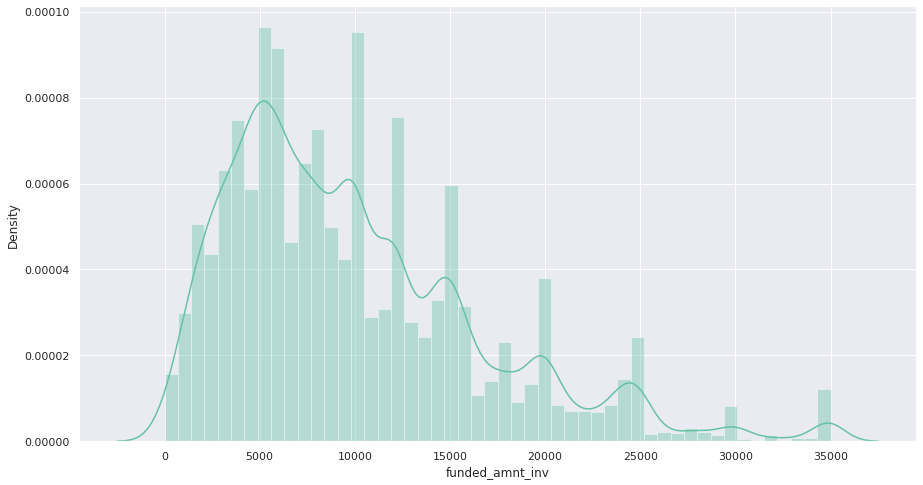

In [66]:
#Analyse the loan amont 
plt.figure(figsize=(15,8))
sns.distplot(loan_df['funded_amnt_inv'])
plt.show()

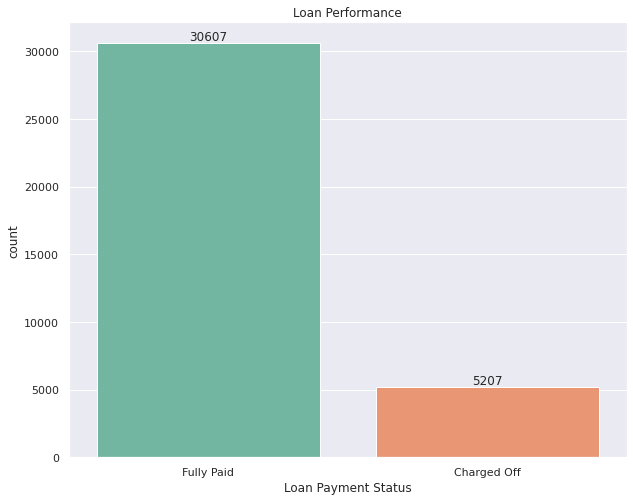

In [67]:
#Visualizing the number of paid loan vs charged off
plot_barchart(loan_df, loan_df['loan_status'], None, False, 'Loan Payment Status', 'Loan Performance' )

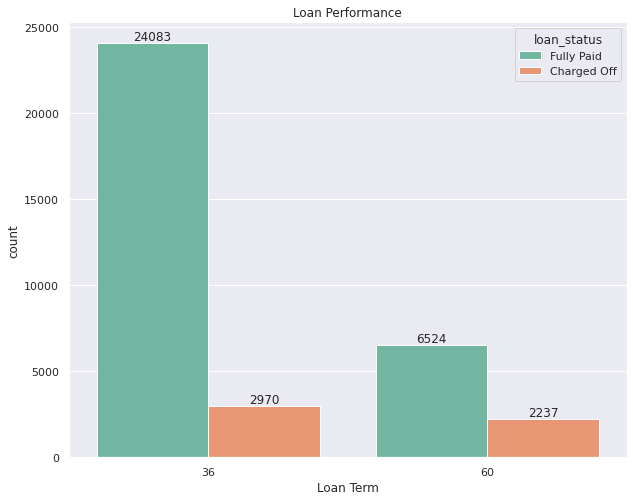

In [68]:
#Visualizing the number of loan over terms
plot_barchart(loan_df, loan_df['term'], loan_df['loan_status'], True, 'Loan Term', 'Loan Performance' )

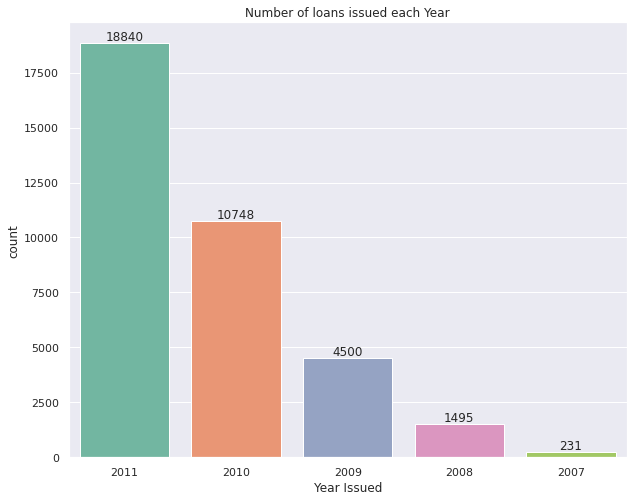

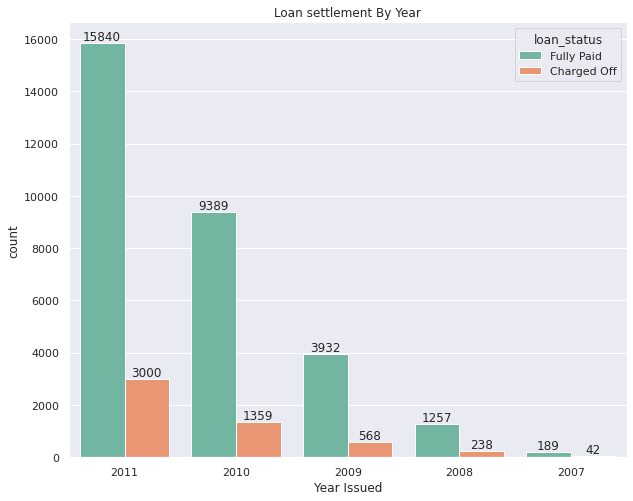

In [69]:
#Visualizing the number of loan issued over the years
plot_barchart(loan_df, loan_df['issue_year'], None, False, 'Year Issued', 'Number of loans issued each Year')
plot_barchart(loan_df, loan_df['issue_year'], loan_df['loan_status'], True, 'Year Issued', 'Loan settlement By Year')

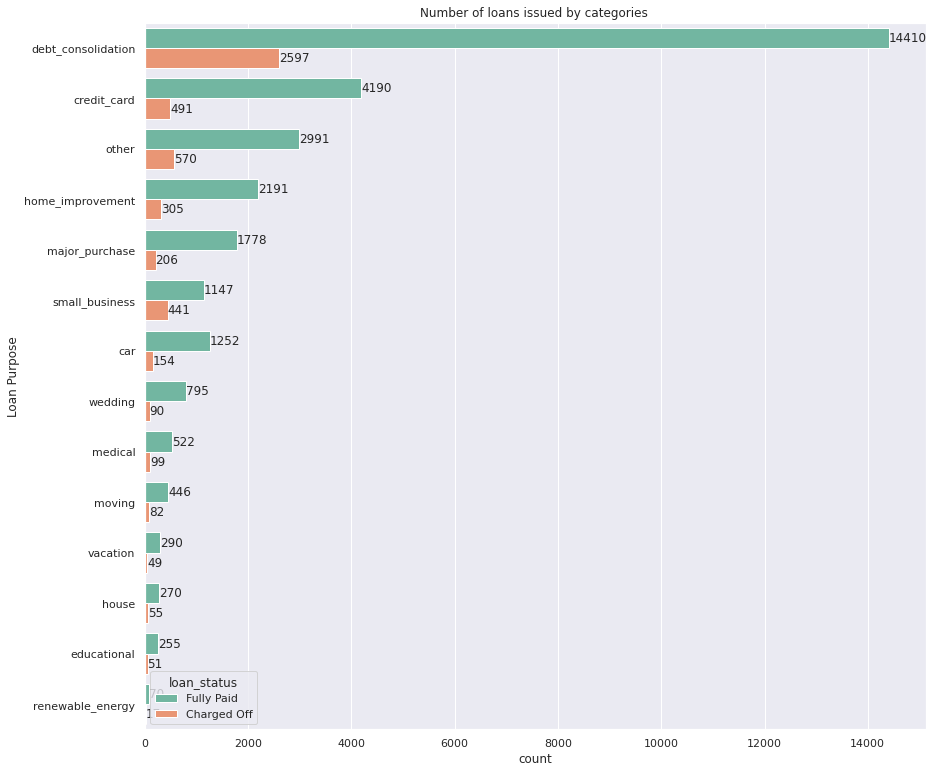

In [70]:
#Visualizing the number of loan issued  by purpose
plot_barchart(loan_df, loan_df['purpose'], loan_df['loan_status'], True, 'Loan Purpose', 'Number of loans issued by categories ', True, 14, 13)

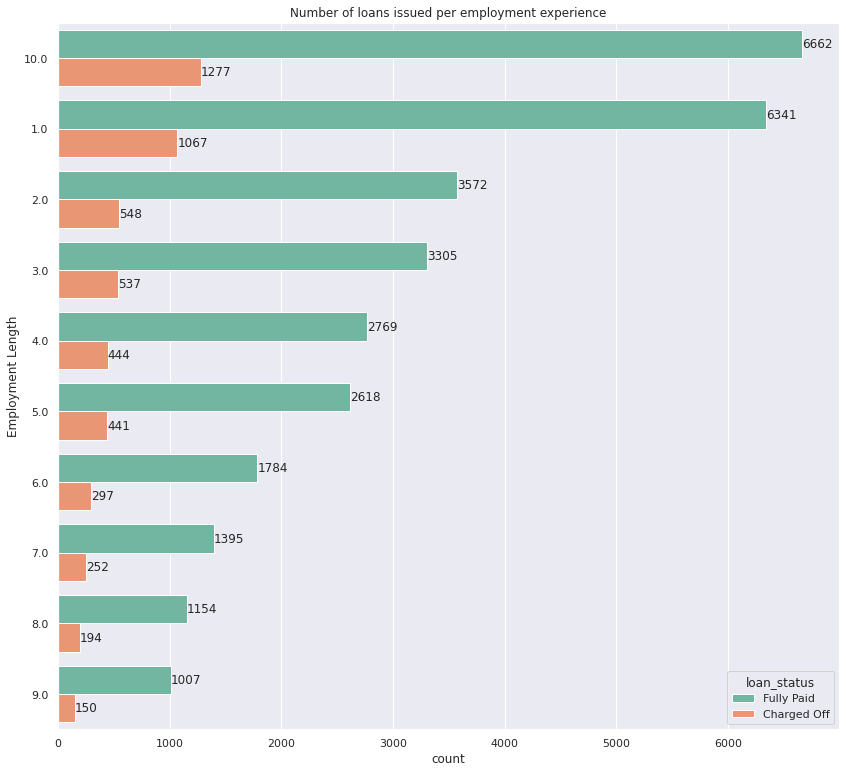

In [71]:
#Visualizing the number of loan issued  by purpose
plot_barchart(loan_df, loan_df['emp_length'], loan_df['loan_status'], True, 'Employment Length', 'Number of loans issued per employment experience', True, 14, 13)

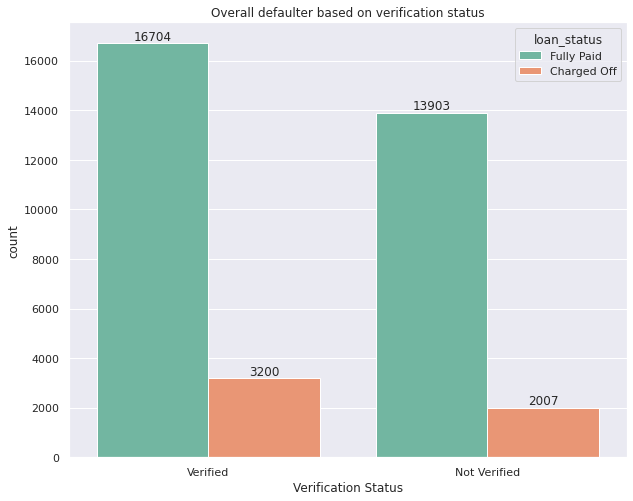

In [72]:
#Visualising the impact of verification status on loan issued
plot_barchart(loan_df, loan_df['verification_status'], loan_df['loan_status'], True, 'Verification Status', 'Overall defaulter based on verification status')

#### Univariate Insights: 
1. Most of the loans were issued in 2011.
2. Only 15% of loan issued were defaulted. 
3. 76% of loan issued was under 36 month term
4. 26% under 60 months term defaulted while only 10% under 36 months term defaulted
5. The main reason for loan application are debt consolidation and credit card repayment.
6. 84% under verified income and 87% under non-verified income were paid fully, hence verification status is not a strong driver.
7. People with over 10 years or less than 1 year of experience takes more loan and the defaulters percentage is 16 and 14 respectively

### Binning 
It is the process of fitting data values within a range to a bin. It is used to transform continuous variables into discrete ones. By binning the following values, it helps to visualize the impact and significance of data:

1. Yearly Income
2. Monthly Income
3. Interest Rate
4. Instalment
5. Total DTI (incl. instalment)
6. Monthly Debt 
7. Funded loan Amount


In [73]:
#Bucketing data for actual loan amount
i_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
i_labels =['0-5K', '5-10K', '10-15K', '15-20K', '20-25K', '25-30K', '30-35K']
loan_df['f_a_range'] = pd.cut(loan_df['funded_amnt'], i_bins,labels=i_labels)
loan_df['f_a_range'].value_counts()

5-10K     12310
0-5K       9007
10-15K     7395
15-20K     3965
20-25K     2146
25-30K      540
30-35K      451
Name: f_a_range, dtype: int64

In [74]:
#Bucketing data for annual_inc
inc_bins = [0, 20000,50000, 100000, 150000]
inc_labels =['Low Inc.', 'Moderate Inc.', 'High Inc.', 'Very High Inc.']
loan_df['y_income_range'] = pd.cut(loan_df['annual_inc'], inc_bins,labels=inc_labels)
loan_df['y_income_range'].value_counts()

High Inc.         17433
Moderate Inc.     13669
Very High Inc.     3703
Low Inc.           1009
Name: y_income_range, dtype: int64

In [75]:
#Bucketing data for monthly_inc
emp_bins = [0, 2500, 5500, 9000, 12500]
emp_labels =['Low Inc.','Moderate Inc.','High Inc.', 'Very High Inc.']
loan_df['m_income_range'] = pd.cut(loan_df['monthly_inc'], emp_bins,labels=emp_labels)
loan_df['m_income_range'].value_counts()

Moderate Inc.     18392
High Inc.         10375
Low Inc.           4183
Very High Inc.     2864
Name: m_income_range, dtype: int64

In [76]:
#Bucketing data for interest rate
int_bins = [0, 5, 10, 15, 20, 25]
int_labels =['0-5%', '5-10%', '10-15%', '15-20%', '20-25%']
loan_df['int_r_range'] = pd.cut(loan_df['int_rate'], int_bins,labels=int_labels)
loan_df['int_r_range'].value_counts()

10-15%    17084
5-10%     11395
15-20%     6664
20-25%      671
0-5%          0
Name: int_r_range, dtype: int64

In [77]:
#Bucketing data for instalment
ins_bins = [10, 400, 700, 1400]
ins_labels =['Low Installment', 'Moderate Installment', 'High Installment']
loan_df['ins_range'] = pd.cut(loan_df['installment'], ins_bins,labels=ins_labels)
loan_df['ins_range'].value_counts()

Low Installment         26273
Moderate Installment     7651
High Installment         1890
Name: ins_range, dtype: int64

In [78]:
#Bucketing data for monthly debt
m_d_bin = [0, 50000, 150000, 350000]
m_d_labels =['Low Debt', 'Moderate Debt', 'High Debt']
loan_df['debt_range'] = pd.cut(loan_df['monthly_debt_p'], m_d_bin,labels=m_d_labels)
loan_df['debt_range'].value_counts()

Moderate Debt    19518
Low Debt         14114
High Debt         2022
Name: debt_range, dtype: int64

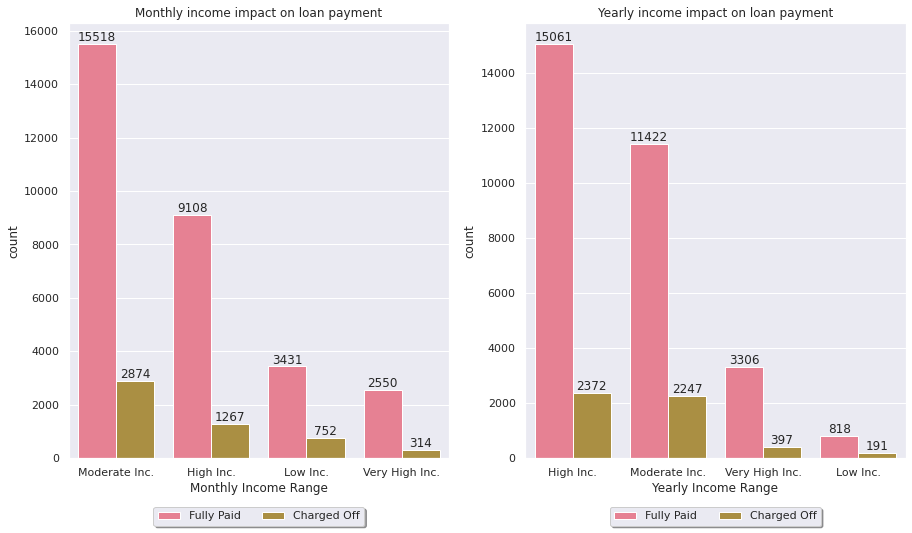

In [79]:
sns.set_theme(style="darkgrid", palette="husl")

#To plot graphs side by side 
def subplot_create(x_var, x_label,hue_var, chart_title, axis):
    ax = sns.countplot(x=x_var,hue = hue_var,order=x_var.value_counts(ascending=False).index, ax=axis)
    ax.set(xlabel = x_label, title = chart_title)

    for container in ax.containers: #annote the graphs
            ax.bar_label(container)
    
    #Placing the legend outside of the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)

fig_dims = (15, 8)
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(loan_df['m_income_range'],'Monthly Income Range', loan_df['loan_status'],'Monthly income impact on loan payment', axis1 )
subplot_create(loan_df['y_income_range'],'Yearly Income Range', loan_df['loan_status'],'Yearly income impact on loan payment', axis2 )


In [80]:
#Bucketing data for total dti (including instalment )
m_dt_bin = [0, 5, 10, 15, 20, 25, 30, 35]
m_dt_labels =['0-5%', '0-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%' ]
loan_df['a_dti_range'] = pd.cut(loan_df['a_dti'], m_dt_bin,labels=m_dt_labels)
loan_df['a_dti_range'].value_counts()

10-15%    8938
15-20%    8388
0-10%     7078
20-25%    6364
0-5%      4404
25-30%     638
30-35%       4
Name: a_dti_range, dtype: int64

### Segmenting Data  and Bivariate Analysis
 
Data are segmented by loan status - Fully paid and Charged Off

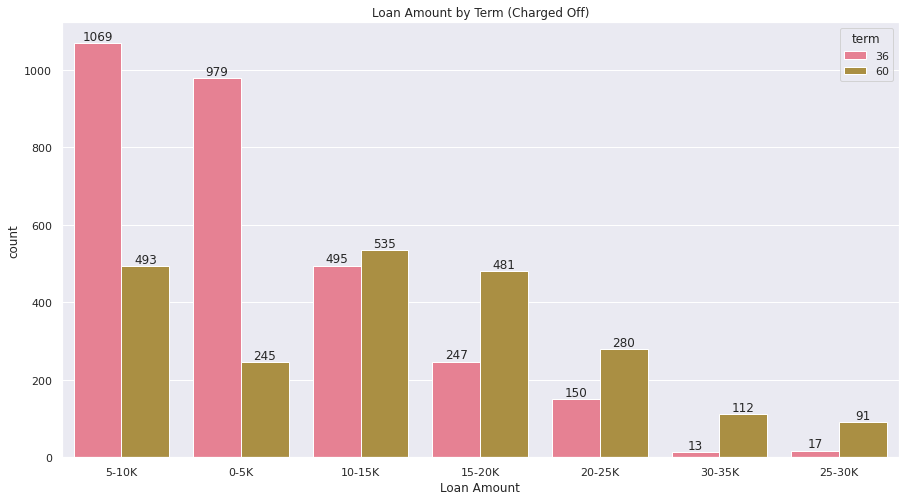

In [81]:
#Segmenting data -  keeping only charged off data
def_df = loan_df[~(loan_df.loan_status == "Fully Paid")]
fig_dims = (15, 8)

#Visualizing the loan amount and terms of defaulters
plot_barchart(def_df, def_df['f_a_range'], def_df['term'], True, 'Loan Amount', 'Loan Amount by Term (Charged Off)', False, 15, 8)

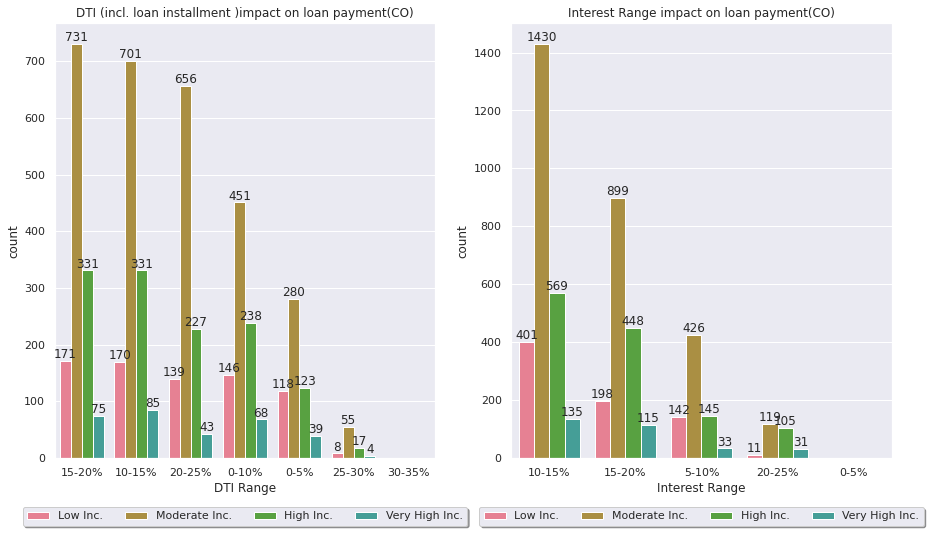

In [82]:
fig_dims = (15, 8)
#plotting to visualize the distribution of total dti and interest rate over monthly income.
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(def_df['a_dti_range'],'DTI Range', def_df['m_income_range'],'DTI (incl. loan installment )impact on loan payment(CO)', axis1 )
subplot_create(def_df['int_r_range'],'Interest Range', def_df['m_income_range'],'Interest Range impact on loan payment(CO)', axis2 )


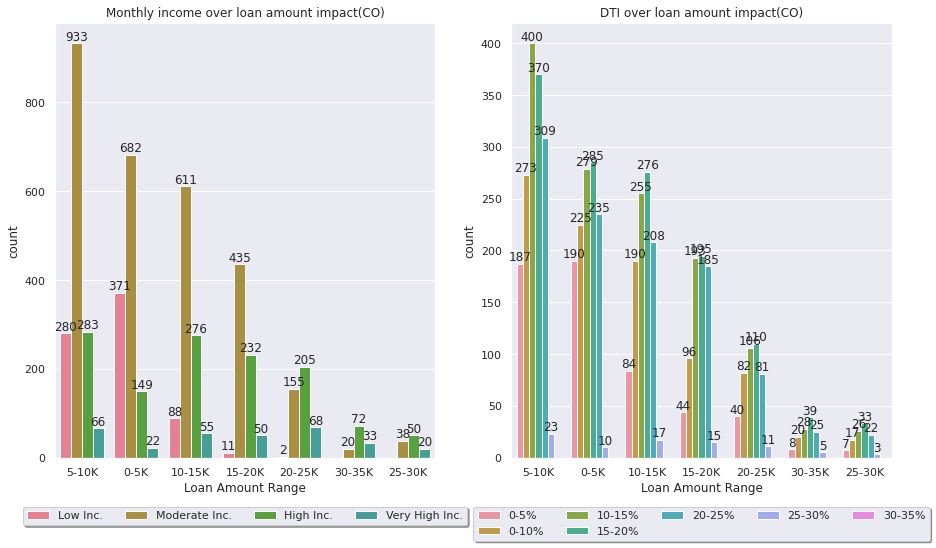

In [83]:
#plotting to visualize the distribution of total dti and interest rate over monthly income.
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(def_df['f_a_range'],'Loan Amount Range', def_df['m_income_range'],'Monthly income over loan amount impact(CO)', axis1 )
subplot_create(def_df['f_a_range'],'Loan Amount Range', def_df['a_dti_range'],'DTI over loan amount impact(CO)', axis2 )


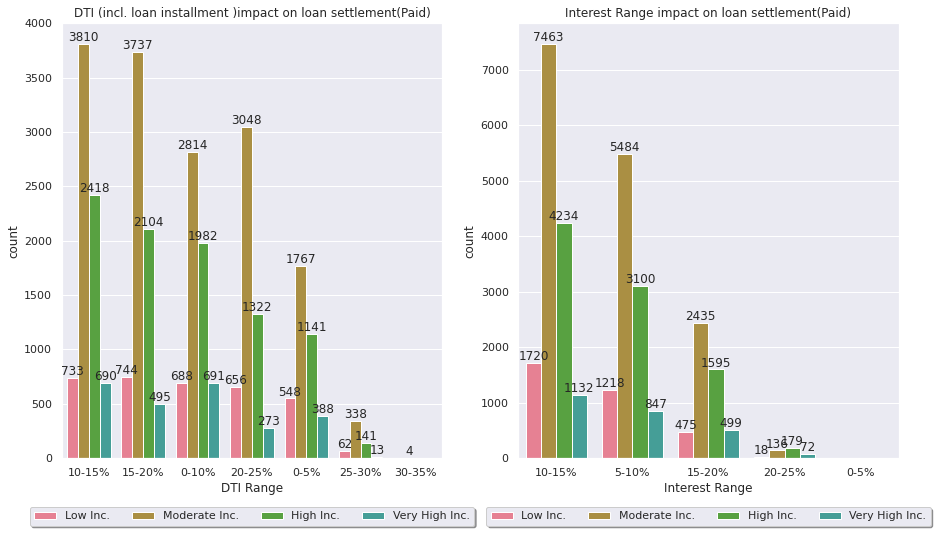

In [84]:
#Segmenting data -  keeping only fully paid borrowers' data
ndef_df = loan_df[~(loan_df.loan_status == "Charged Off")]

fig_dims = (15, 8)

#plotting to visualize the distribution of total dti and interest rate over monthly income.
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(ndef_df['a_dti_range'],'DTI Range', ndef_df['m_income_range'],'DTI (incl. loan installment )impact on loan settlement(Paid)', axis1 )
subplot_create(ndef_df['int_r_range'],'Interest Range', ndef_df['m_income_range'],'Interest Range impact on loan settlement(Paid)', axis2 )


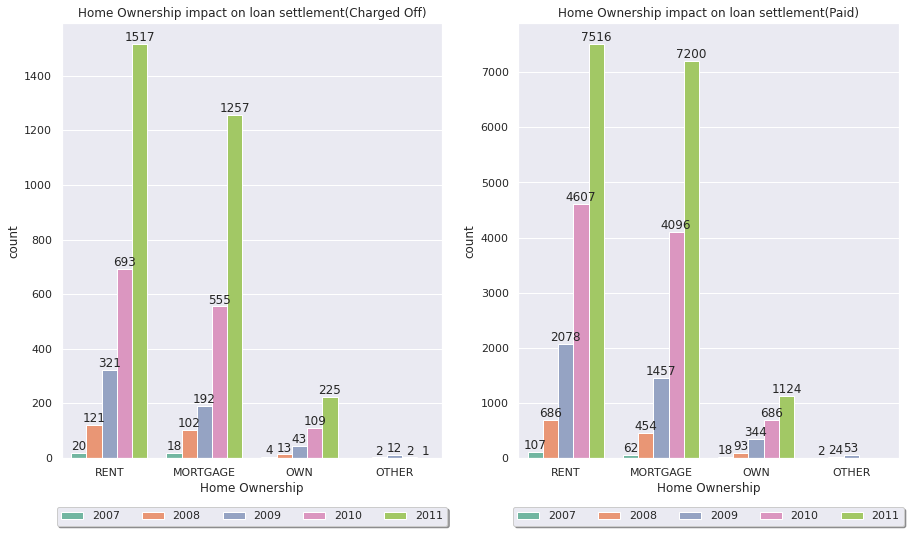

In [85]:
sns.set_theme(style="darkgrid", palette="Set2")
fig_dims = (15, 8)
#plotting to visualize the distribution of home ownership per year
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(def_df['home_ownership'],'Home Ownership', def_df['issue_year'],'Home Ownership impact on loan settlement(Charged Off)', axis1 )
subplot_create(ndef_df['home_ownership'],'Home Ownership', ndef_df['issue_year'],'Home Ownership impact on loan settlement(Paid)', axis2 )


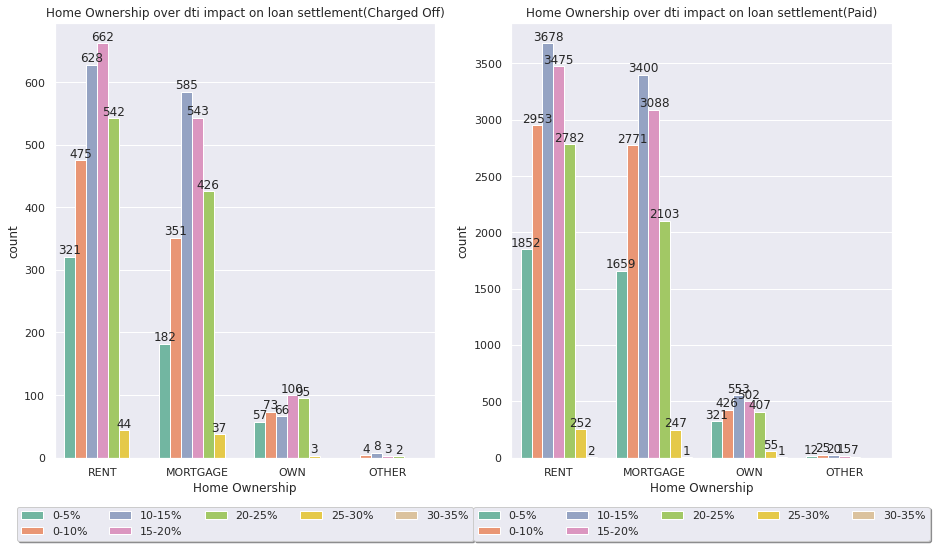

In [86]:
fig_dims = (15, 8)
#plotting to visualize the impact of home ownership over the total dti
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(def_df['home_ownership'],'Home Ownership', def_df['a_dti_range'],'Home Ownership over dti impact on loan settlement(Charged Off)', axis1 )
subplot_create(ndef_df['home_ownership'],'Home Ownership', ndef_df['a_dti_range'],'Home Ownership over dti impact on loan settlement(Paid)', axis2 )


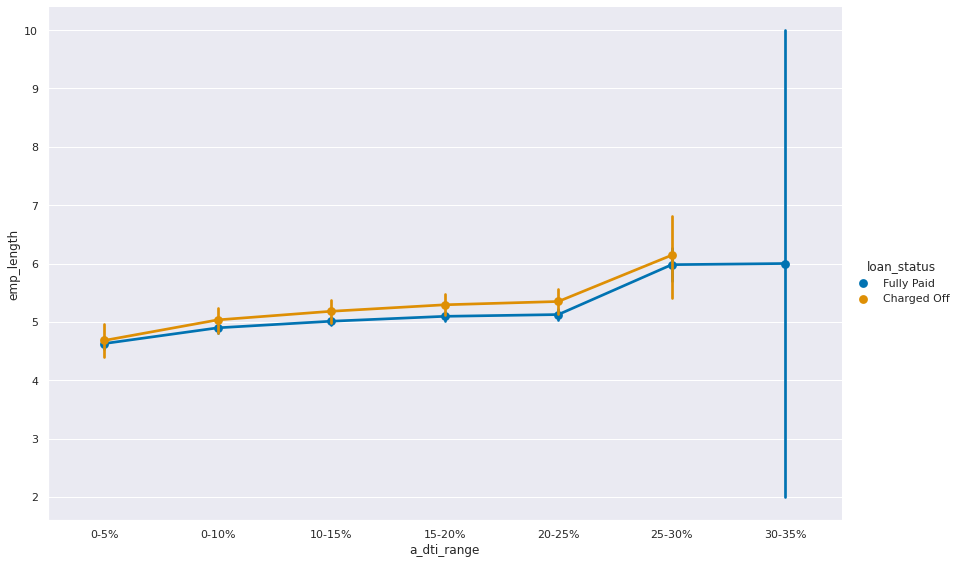

In [87]:
#plotting to visualize the distribution of total dti over employment length
point_plot = sns.factorplot(x="a_dti_range", y="emp_length",  hue="loan_status", data=loan_df, 
                       palette="colorblind", kind='point',size = 8, aspect = 1.5, legend_out=True)

plt.show()

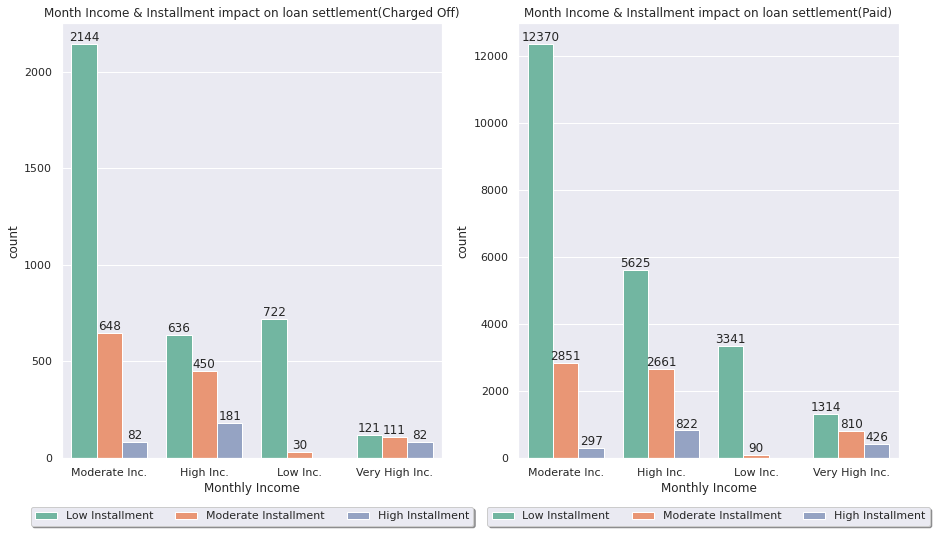

In [88]:
fig_dims = (15, 8)
#plotting to visualize the impact monthly income over instalment for each segment 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(def_df['m_income_range'],'Monthly Income', def_df['ins_range'],'Month Income & Installment impact on loan settlement(Charged Off)', axis1 )
subplot_create(ndef_df['m_income_range'],'Monthly Income', ndef_df['ins_range'],'Month Income & Installment impact on loan settlement(Paid)', axis2 )

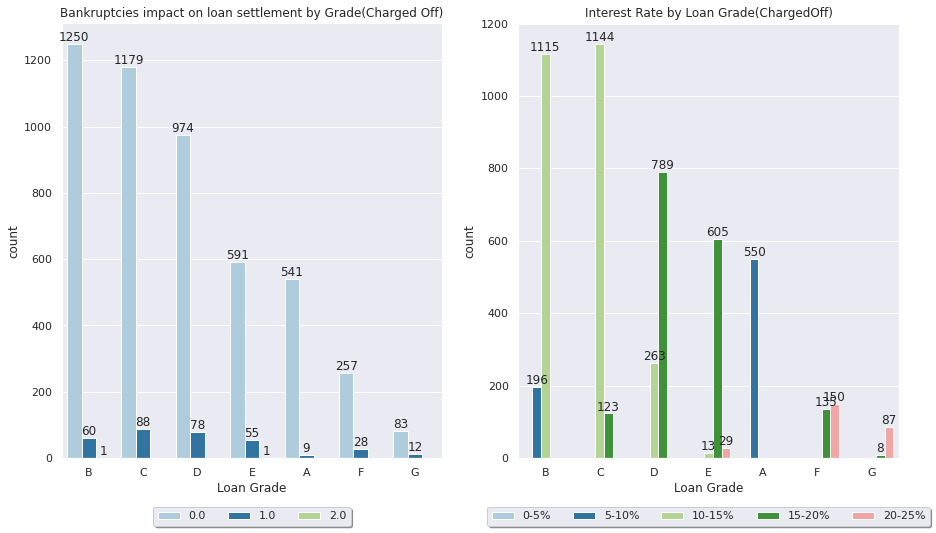

In [89]:
sns.set_theme(style="darkgrid", palette="Paired")

fig_dims = (15, 8)
#plotting to visualize the distribution of grade over public bankruptcies record
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=fig_dims)
subplot_create(def_df['grade'],'Loan Grade', def_df['pub_rec_bankruptcies'],'Bankruptcies impact on loan settlement by Grade(Charged Off)', axis1 )
subplot_create(def_df['grade'],'Loan Grade', def_df['int_r_range'],'Interest Rate by Loan Grade(ChargedOff)', axis2 )


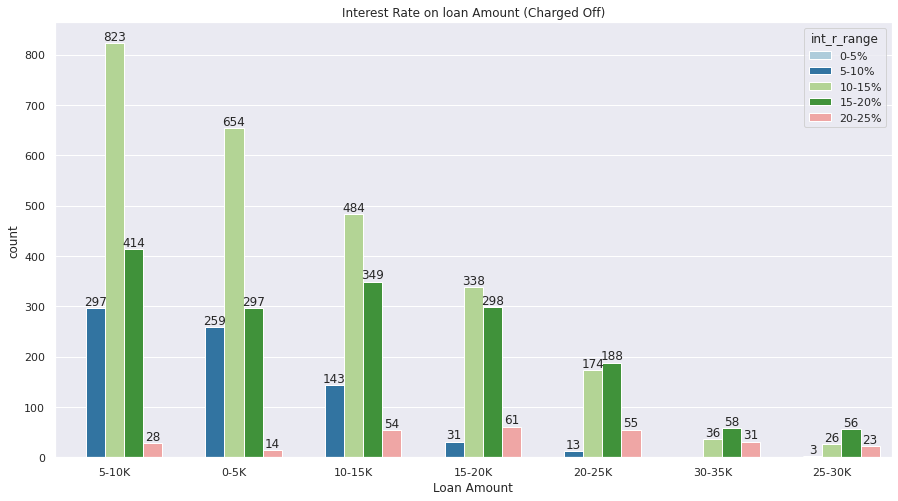

In [90]:
plot_barchart(def_df, def_df['f_a_range'], def_df['int_r_range'], True, 'Loan Amount', 'Interest Rate on loan Amount (Charged Off)', False, 15, 8)

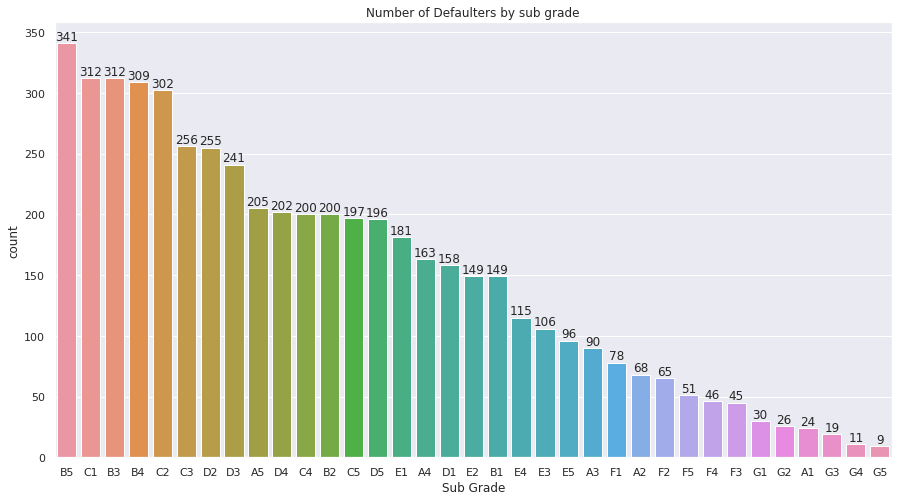

In [91]:
#Visualizing the Number of defaulters per sub grafe
plot_barchart(def_df, def_df['sub_grade'], None, False, 'Sub Grade', 'Number of Defaulters by sub grade', False, 15, 8)

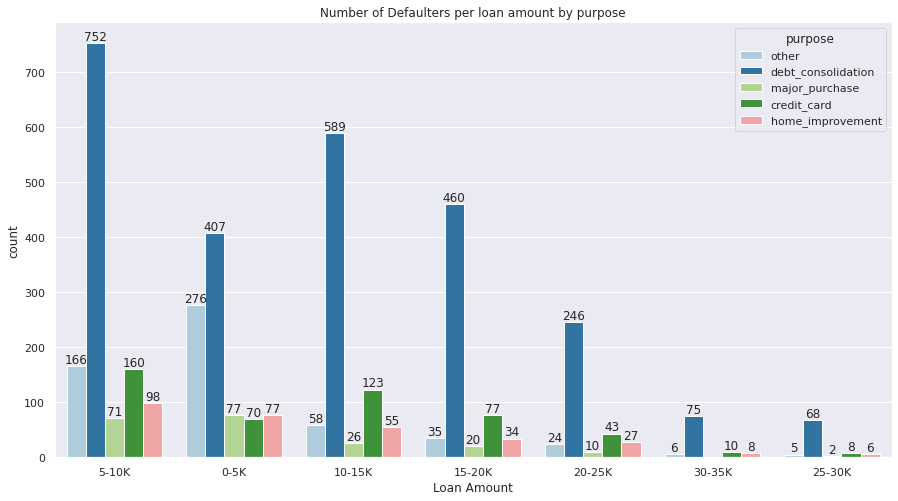

In [92]:
#Further segmenting the data to analyse defaulters within specific purpose
def_purpose_df = def_df[def_df.purpose.isin(['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase'])]
plot_barchart(def_purpose_df, def_purpose_df['f_a_range'], def_purpose_df['purpose'], True, 'Loan Amount', 'Number of Defaulters per loan amount by purpose', False, 15, 8)

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='installment'>

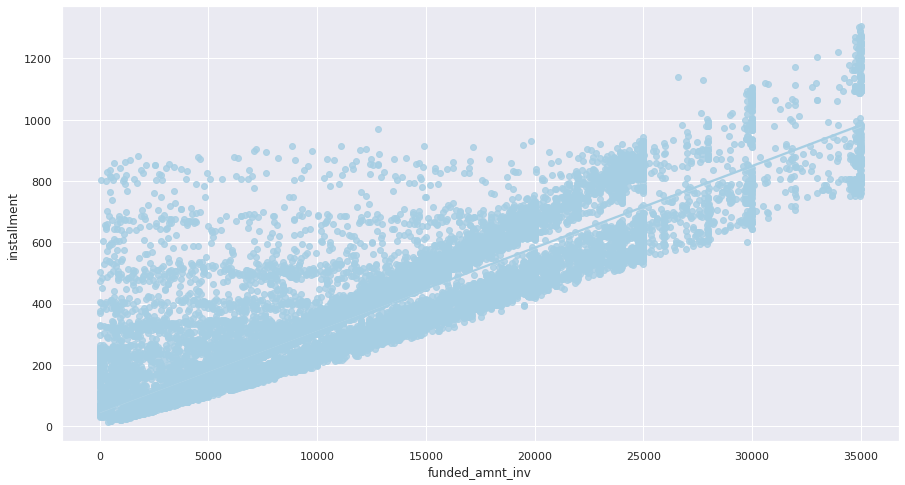

In [93]:
#Finding the correlation between funded amount and inst
plt.figure(figsize=(15,8))
sns.regplot(x=loan_df['funded_amnt_inv'], y=loan_df['installment'])

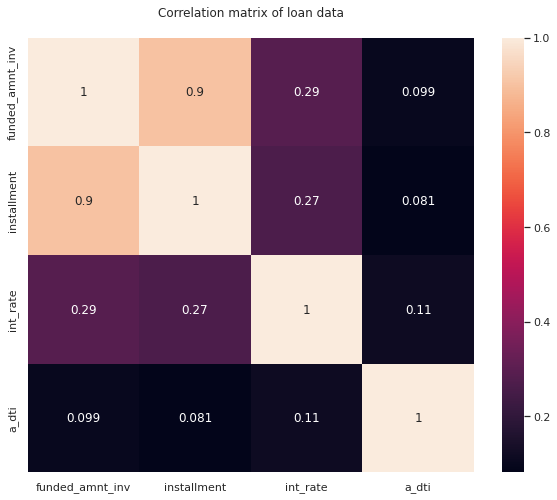

In [94]:
#Plotting to see the correlation between continuous variable 
loan_con_df  = loan_df[['funded_amnt_inv', 'installment', 'int_rate', 'm_income_range', 'a_dti']]

plt.figure(figsize=(10,8))

hm = sns.heatmap(loan_con_df.corr(), annot = True)
hm.set(title = "Correlation matrix of loan data\n")
plt.show()

corr = loan_con_df.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Bivariate Insights: 
1. People whose DTI range is between 15-20% and whose salary is within the range of 2500 to 5500 have defaulted the most. 
2. Loan with interest rate between 10 to 15 % have most defaulters.
3. Loan amounting between 5K to 10K and have 36 months term
4. Employment Length of 5 to 6 years with DTI ranging from 20 to 30%
5. Loan amount given has a positive correlation with instalment
6. Total DTI have little to nearly linear correlation
7. Loan with Grade B and C have more defaulters due to their high interest rate 
8. Interest rate of 10-15% have more defaulters especially in loan amount of 5 thousands to 10 thousands
9. In each purpose category, those of debt consolidation default the most. 
10. Borrowers with 1 public bankruptcy record default the most.

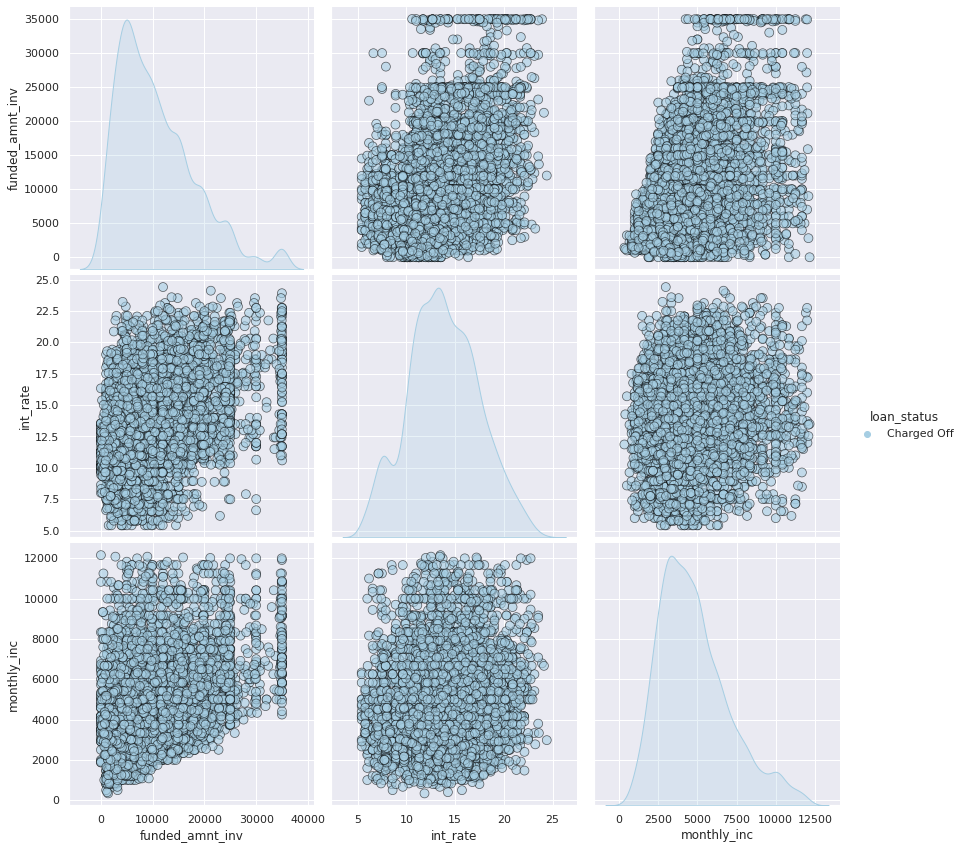

In [95]:
sns.pairplot(loan_df[loan_df['loan_status'] == 'Charged Off'], 
             vars = ['funded_amnt_inv', 'int_rate', 'monthly_inc'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);